In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore

In [12]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()
print("Info of the dataset:\n", insurance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Info of the dataset:
 None


In [3]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance_data.shape

(1338, 7)

In [5]:
dup_rows = insurance_data[insurance_data.duplicated()]     //preprocessing
print(dup_rows)    

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


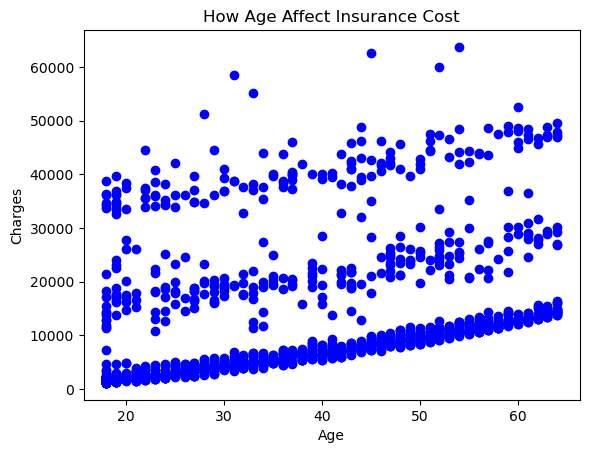

In [7]:
x = insurance_data.iloc[:, 0].values
y = insurance_data.iloc[:, -1].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.scatter(x, y, color='blue')
plt.title('How Age Affect Insurance Cost')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [8]:
X = insurance_data.iloc[:, 0].values.reshape(-1, 1)
Y = insurance_data.iloc[:, -1].values.reshape(-1, 1)
                                                                                              //Model Training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

charge_model = LinearRegression()
charge_model.fit(X_train, Y_train)

LinearRegression()

In [9]:
Y_pred = charge_model.predict(X_test)
print(Y_pred)

[[16278.18029845]
 [15086.32245041]
 [15324.69402002]
 [18423.52442491]
 [16039.80872884]
 [11987.49204552]
 [ 8173.54693181]
 [16039.80872884]
 [12940.97832395]
 [11272.3773367 ]
 [11987.49204552]
 [15801.43715924]
 [14132.83617199]
 [11749.12047592]
 [10318.89105828]
 [15801.43715924]
 [18185.15285531]
 [10080.51948867]
 [12940.97832395]
 [ 8650.29007103]
 [16039.80872884]
 [17231.66657688]
 [16278.18029845]
 [15086.32245041]
 [ 9127.03321024]
 [11510.74890631]
 [10557.26262788]
 [13417.72146317]
 [11272.3773367 ]
 [14609.5793112 ]
 [13417.72146317]
 [17946.7812857 ]
 [18661.89599452]
 [16993.29500727]
 [ 9603.77634946]
 [11034.0057671 ]
 [14847.95088081]
 [10557.26262788]
 [13417.72146317]
 [ 8650.29007103]
 [12464.23518474]
 [10795.63419749]
 [13179.34989356]
 [17708.40971609]
 [ 8173.54693181]
 [ 8888.66164063]
 [15801.43715924]
 [13894.46460238]
 [11034.0057671 ]
 [17470.03814648]
 [ 9365.40477985]
 [ 8411.91850142]
 [15324.69402002]
 [16039.80872884]
 [17708.40971609]
 [10557.26

In [15]:

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)                           //# Evaluation
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 139176465.01367894
Mean Absolute Error: 9147.177402778987
R2 Score: 0.12539120236863355


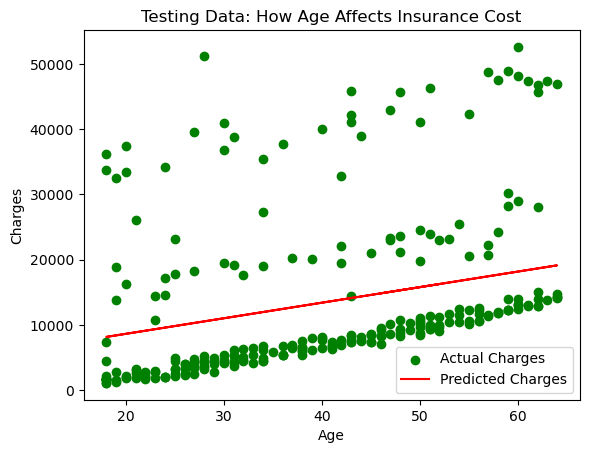

In [10]:
plt.scatter(X_test, Y_test, color='green', label='Actual Charges')
plt.plot(X_test, Y_pred, color='red', label='Predicted Charges')
plt.title('Testing Data: How Age Affects Insurance Cost')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()